<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj31-nlp-imdb-movie-reviews?scriptVersionId=196022052" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>IMDB Movie Reviews</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This project aims to predict sentiment in movie reviews using the IMDB dataset, which contains 50,000 highly polar movie reviews. The dataset is split evenly into 25,000 reviews for training and 25,000 for testing, making it ideal for binary sentiment classification. By employing the Bag of Words model for feature extraction, the project seeks to classify reviews as positive or negative, providing insights into public opinion on films.

# **Import Libraries and Data**
---

In [1]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 38.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import html
import unicodedata
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from collections import Counter
from spellchecker import SpellChecker
from tensorflow.keras.preprocessing.text import Tokenizer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [4]:
#fix nltk kaggle problem

import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [5]:
#!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score, confusion_matrix

In [7]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 93%|███████████████████████████████████▍  | 24.0M/25.7M [00:01<00:00, 26.6MB/s]
100%|██████████████████████████████████████| 25.7M/25.7M [00:01<00:00, 16.1MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [8]:
df = pd.read_csv('IMDB Dataset.csv').copy()

# **Take a look at the data**
---

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [13]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# **Data Preprocessing**
--------

In [14]:
# Define emoji removal function
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def convert_emojis(text):
    for emot, emoji in UNICODE_EMO.items():
        text = re.sub(r'('+re.escape(emoji)+')', "_".join(emot.replace(",", "").replace(":", "").split()), text)
    return text

# Define URL removal function
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# Define spelling correction function
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            # Check if a correction exists before appending
            correction = spell.correction(word)
            if correction is not None:
                corrected_text.append(correction)
            else:
                corrected_text.append(word) # Keep original word if no correction
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_non_ascii(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def replace_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_whitespaces(text):
    return text.strip()

def text2words(text):
    return word_tokenize(text)

def remove_stopwords(words, stop_words):
    return [word for word in words if word not in stop_words]

def remove_frequent_words(words, frequent_words):
    return [word for word in words if word not in frequent_words]

def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def compute_frequent_words(texts, n=10):
    """Compute the most frequent words in a list of texts"""
    cnt = Counter()
    for text in texts:
        for word in text.split():
            cnt[word] += 1
    return set(word for word, _ in cnt.most_common(n))

def normalize_text(text, frequent_words, stop_words):
    """Normalize text by performing various preprocessing steps"""
    text = remove_emoji(text)
    #text = convert_emojis(text)
    text = remove_urls(text)
    text = remove_special_chars(text)
    text = remove_html_tags(text)
    text = remove_non_ascii(text)
    text = to_lowercase(text)
    text = remove_punctuation(text)
    text = replace_numbers(text)
    text = remove_whitespaces(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    words = remove_frequent_words(words, frequent_words)
    words = lemmatize_words(words)
    #words = stem_words(words)
    text = ' '.join(words)
    #text = correct_spellings(text)
    return text

texts = df["review"].values
frequent_words = compute_frequent_words(texts)

# Apply normalization function to the DataFrame
df["cleaned_review"] = df["review"].apply(lambda x: normalize_text(x, frequent_words, stop_words))


In [15]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [16]:
df["cleaned_review"][0]

'one reviewer mentioned watching oz episode youll hooked right exactly happened first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far away would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bitch due la

# **Text preparation**
----------

**BOW**

In [17]:
tokenizer = Tokenizer(num_words=10000,oov_token='UNK')
tokenizer.fit_on_texts(df['cleaned_review'])
bow = tokenizer.texts_to_matrix(df['cleaned_review'], mode='freq')  # binary , count , tfidf(need to normlize)
bow.shape

(50000, 10000)

**Splitting**

In [18]:
df.sentiment = df.sentiment.apply(lambda x: 1 if x=='positive' else 0)

In [19]:
X = bow
y= df['sentiment']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

# **Modelling**
-------

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping , ReduceLROnPlateau

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
ES = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

In [24]:
model.compile(optimizer='adam',
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test, y_test), callbacks = [RL,ES])

history_dict = history.history
history_dict.keys()

Epoch 1/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - binary_accuracy: 0.7661 - loss: 0.5647 - val_binary_accuracy: 0.8854 - val_loss: 0.2833 - learning_rate: 0.0010
Epoch 2/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.9073 - loss: 0.2427 - val_binary_accuracy: 0.8949 - val_loss: 0.2624 - learning_rate: 0.0010
Epoch 3/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.9276 - loss: 0.1981 - val_binary_accuracy: 0.8963 - val_loss: 0.2672 - learning_rate: 0.0010
Epoch 4/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.9416 - loss: 0.1673 - val_binary_accuracy: 0.8909 - val_loss: 0.2793 - learning_rate: 0.0010
Epoch 5/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.9467 - loss: 0.1534 - val_binary_accuracy: 0.8903 - val_loss: 0.2920 - learning_rate: 0.0010
Epoch 6/20
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - binary_accuracy: 0.9528 - loss: 0.1373 - val_binary_accuracy: 0.8864 - val_loss: 0.3149 - learning_rate:

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss', 'learning_rate'])

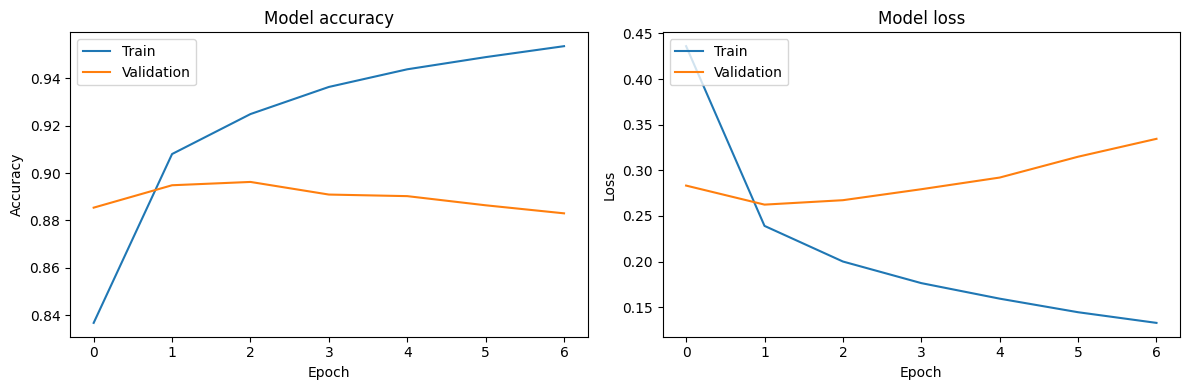

In [25]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# **Prediction**
----

In [26]:
loss,acc = model.evaluate(X_train,y_train,batch_size = 16, verbose = 0)
print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)
print('-'*75)
loss,acc = model.evaluate(X_test,y_test,batch_size = 16, verbose = 0)
print('The accuracy of the model for test data is:',acc*100)
print('The Loss of the model for test data is:',loss)

The accuracy of the model for training data is: 93.05142760276794
The Loss of the model for training data is: 0.19429145753383636
---------------------------------------------------------------------------
The accuracy of the model for test data is: 89.48666453361511
The Loss of the model for test data is: 0.2623705565929413


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
F1 Score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      7500
           1       0.90      0.89      0.89      7500

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



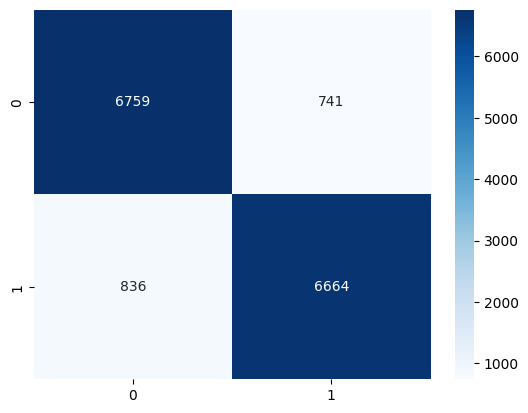

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.show()